## Step1: Reading and understanding the data

In [1]:
# Import Libraries for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Check the head of the dataset
bike = pd.read_csv('day.csv')
bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [3]:
# checking total no. of data present in columnwise and Dtypes & Null values as well.
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# Checking no. of row and columns persent in the dataset 
bike.shape

(730, 16)

### Inference
1. Looking at the data, there seems to be some fields that are categorical in nature, shown here as integer/float.
2. I will analyse and finalize to whether convert them to categorical or treat them as integer.

In [5]:
# checking mean, median, percentile data
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Checking columns present in dataset
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Step2: Cleaning Data & Finding Missing Values 

In [7]:
# lets move further to find missing and null values for getting more clarification about the dataset
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=True)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
# Checking the duplicated is any
bike.drop_duplicates(subset=None, inplace=True)
bike.shape

(730, 16)

### Inference
1. No duplicates variables
2. No missing values in the given dataset

## Step3: Removing redundant & unwanted columns from the dataset
Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

1. instant : Its only an index value

2. dteday : This has the date, Since we already have seperate columns for 'year' & 'month'. Hence, we could drop this column.

3. casual & registered : Both these columns contains the count of bike booked by different categories of customers. 
Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.
More over, we have created a new variable to have the ratio of these customer types.

We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation

In [9]:
## drop column which is not requried for our analaysis.
bike_new = bike.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1)

In [10]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
bike_new.shape

(730, 12)

In [12]:
# Converting specific numeric variables to categorical variables
bike_new['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bike_new.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [13]:
bike_new['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
bike_new.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Thursday,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Friday,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Saturday,0,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Sunday,0,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Monday,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [14]:
bike_new['weathersit'].replace({1:"Clear_Clouds",2:"Mist_cloudy",3:"Light_snow",4:'Heavy_Fog'},inplace=True)
bike_new.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Thursday,1,Clear_Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Friday,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Saturday,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Sunday,0,Clear_Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Monday,1,Clear_Clouds,6.184153,7.54440,48.2917,14.958889,1321


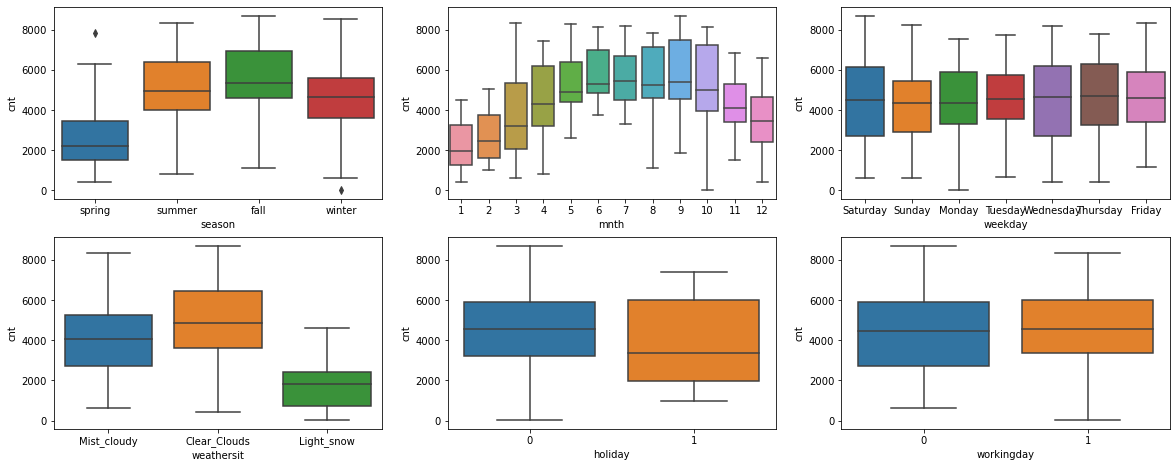

In [15]:
# visualizing the categorical variables
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=bike_new)
plt.subplot(3,3,2)
sns.boxplot(x='mnth', y='cnt', data=bike_new)
plt.subplot(3,3,3)
sns.boxplot(x='weekday', y='cnt', data=bike_new)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit', y='cnt', data=bike_new)
plt.subplot(3,3,5)
sns.boxplot(x='holiday', y='cnt', data=bike_new)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=bike_new)
plt.show()

# Inference

There were 6 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’). The inference that we could derive here:

- season: Almost 26% of the bike booking were happening in fall season with a median of over 5000 booking (for the period of 2 years). This was followed by summer & winter with 25% & 24% of total booking. This indicates, season can be a good predictor for the dependent variable.

- mnth: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

- weathersit: Almost 67% of the bike booking were happening during "weathersit1: Clear, Few clouds, Partly cloudy, Partly cloudy" with a median of close to 5000 booking (for the period of 2 years). This was followed by "weathersit2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist" with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings and can be a good predictor for the dependent variable.

- holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

- weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

- workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

## Step4: Data preparation for modelling
- Encoding:
    - Create Dummy variables
    - Drop original variable for which the dummy was created
    - Drop first dummy variable for each set of dummies created.
    - Converting categorical variable to dummy vars
- Splitting into train and test
- Rescaling of variables


In [16]:
import calendar
bike_new['mnth'] = bike_new['mnth'].apply(lambda x: calendar.month_abbr[x])

In [17]:
# creating dummy variables for season , mnth ,weathersit ,weekday 
dummy = bike_new[['season','mnth','weekday','weathersit']]

# drop the first column
dummy1 = pd.get_dummies(dummy, drop_first=True )
dummy1.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snow,weathersit_Mist_cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
# concatenate with orginal table
bike_new = pd.concat([bike_new,dummy1],axis = 1)

In [19]:
# Now let's see the head of our dataframe.
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snow,weathersit_Mist_cloudy
0,spring,0,Jan,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Monday,1,Clear_Clouds,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,Clear_Clouds,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wednesday,1,Clear_Clouds,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [20]:
# dropping columns for which dummy variables were created
bike_new.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snow,weathersit_Mist_cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      730 non-null    int64  
 1   holiday                 730 non-null    int64  
 2   workingday              730 non-null    int64  
 3   temp                    730 non-null    float64
 4   atemp                   730 non-null    float64
 5   hum                     730 non-null    float64
 6   windspeed               730 non-null    float64
 7   cnt                     730 non-null    int64  
 8   season_spring           730 non-null    uint8  
 9   season_summer           730 non-null    uint8  
 10  season_winter           730 non-null    uint8  
 11  mnth_Aug                730 non-null    uint8  
 12  mnth_Dec                730 non-null    uint8  
 13  mnth_Feb                730 non-null    uint8  
 14  mnth_Jan                730 non-null    ui

## Splitting the data into train and test

In [22]:
bike_new.shape

(730, 30)

In [23]:
import sklearn
from sklearn.model_selection import train_test_split

In [24]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state=350)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


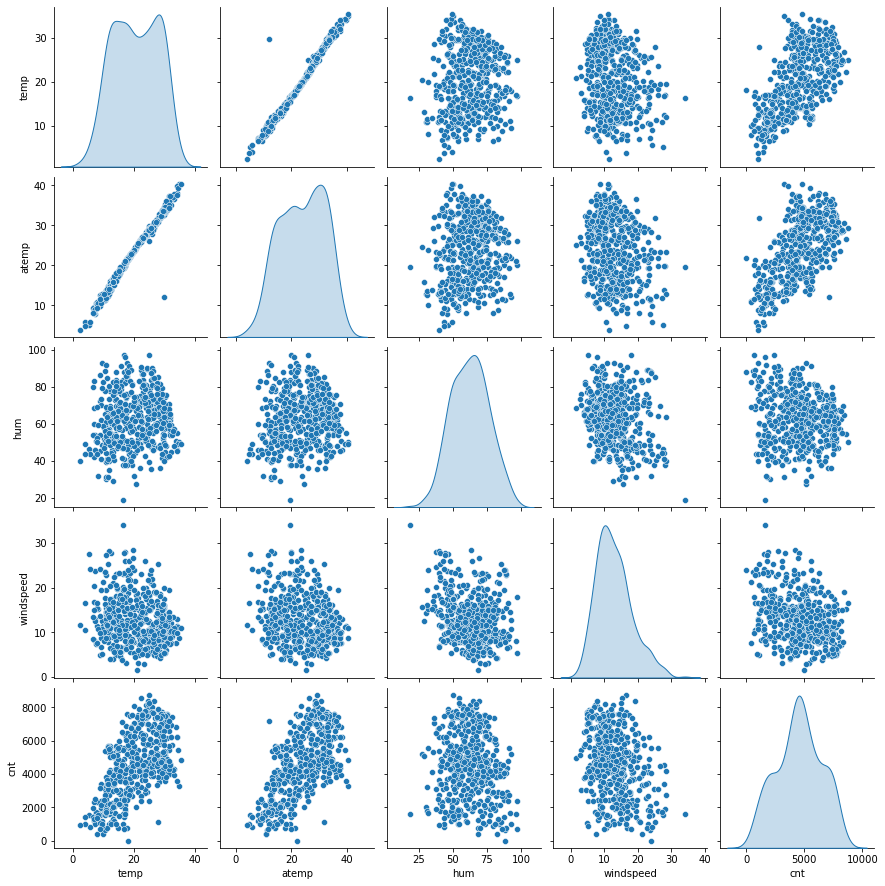

In [25]:
# Create a new dataframe of only numeric variables:

bike_numer = df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_numer, diag_kind='kde')
plt.show()

#Inference
- The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

## Rescaling the features or variables

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [27]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [28]:
df_train[num_vars].shape

(510, 5)

In [29]:
df_train.shape

(510, 30)

In [30]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snow,weathersit_Mist_cloudy
229,0,0,1,0.813093,0.803463,0.594795,0.434609,0.435228,0,0,...,0,0,0,0,0,1,0,0,0,0
86,0,0,1,0.255711,0.245927,0.145628,0.391308,0.230787,0,1,...,0,0,1,0,0,0,0,0,0,0
465,1,0,1,0.360813,0.355730,0.358978,0.562561,0.556834,0,1,...,0,0,0,0,0,0,0,1,0,0
182,0,0,0,0.846320,0.810421,0.327137,0.191045,0.586401,0,0,...,0,0,0,1,0,0,0,0,0,0
341,0,0,1,0.257562,0.245051,0.499734,0.448731,0.379659,0,0,...,0,0,0,0,0,1,0,0,0,0


In [31]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snow,weathersit_Mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.494118,0.035294,0.676471,0.548366,0.548997,0.556119,0.350537,0.519485,0.243137,0.268627,...,0.092157,0.080392,0.139216,0.143137,0.145098,0.133333,0.154902,0.137255,0.023529,0.345098
std,0.500456,0.184703,0.468282,0.223762,0.220454,0.176241,0.162957,0.221995,0.429398,0.443681,...,0.289531,0.272166,0.346511,0.350557,0.352545,0.340268,0.362166,0.344454,0.151726,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.370064,0.423261,0.232055,0.362546,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.544672,0.555979,0.561338,0.327568,0.523470,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.747156,0.733011,0.680384,0.441027,0.683473,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


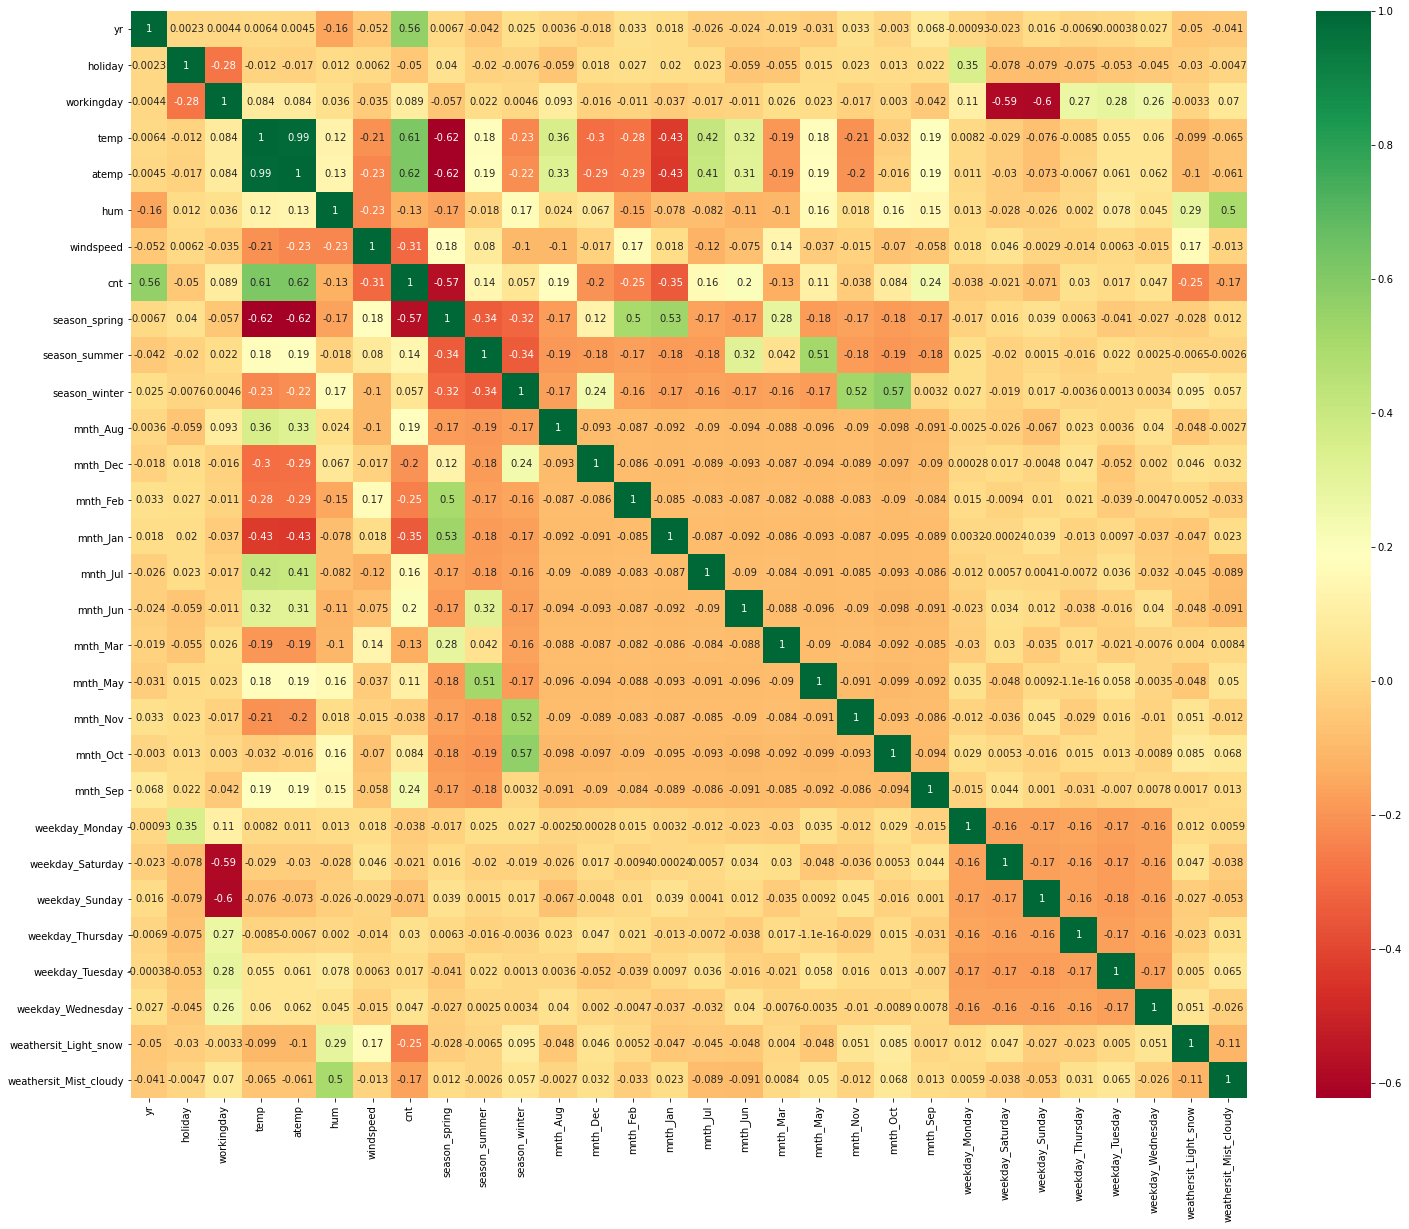

In [32]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

# Inference
- The heatmap clearly shows that all the variables are multicollinear in nature, and the variables have high collinearity with the target variable. Here, we can see that the cnt is highly correlated with the temp & atemp.
- We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

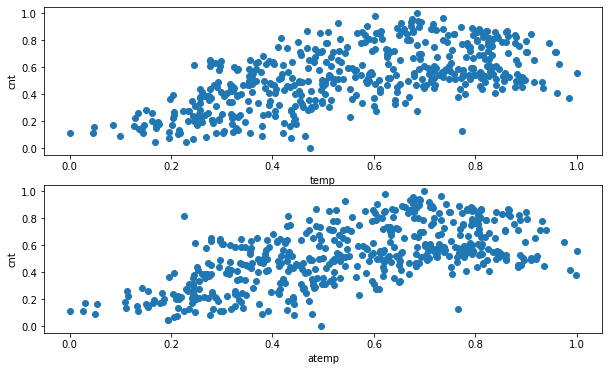

In [33]:
# Lets observe a scatter plot between temp & atemp with cnt for reconfirmation

fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0].scatter(x = df_train['temp'], y = df_train['cnt'])
ax[0].set_xlabel("temp")
ax[0].set_ylabel("cnt")

ax[1].scatter(x = df_train['atemp'], y = df_train['cnt'])
ax[1].set_xlabel("atemp")
ax[1].set_ylabel("cnt")

plt.show()

# Inference
- Clear high correlation is visible between the atemp & temp with cnt
- Finalization can be very difficult with this plot, we can conclude with p-value & VIF with further analysis

# Building a Linear Model

In [34]:
# Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

In [35]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snow,weathersit_Mist_cloudy
229,0,0,1,0.813093,0.803463,0.594795,0.434609,0,0,0,...,0,0,0,0,0,1,0,0,0,0
86,0,0,1,0.255711,0.245927,0.145628,0.391308,0,1,0,...,0,0,1,0,0,0,0,0,0,0
465,1,0,1,0.360813,0.355730,0.358978,0.562561,0,1,0,...,0,0,0,0,0,0,0,1,0,0
182,0,0,0,0.846320,0.810421,0.327137,0.191045,0,0,0,...,0,0,0,1,0,0,0,0,0,0
341,0,0,1,0.257562,0.245051,0.499734,0.448731,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [36]:
y_train.head()

229    0.435228
86     0.230787
465    0.556834
182    0.586401
341    0.379659
Name: cnt, dtype: float64

## Importing RFE 

- Currently, we have almost 30 Predictors to Predict our outcome. Analysing these many predictors can be very hectic.
- To simplify this process, we will use RFE (Recursive Feature Elimination) method to which will provide us with set of variables ranked in an order of importance (of impacting outcome)
- We will pass an arbitary number (here 15), which means the method will rank first 15 predictors as 1 & remaining as 0.

In [37]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

#running RFE
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 13),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 15),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 5),
 ('mnth_Mar', True, 1),
 ('mnth_May', False, 3),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 2),
 ('weekday_Saturday', False, 11),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 14),
 ('weekday_Tuesday', False, 6),
 ('weekday_Wednesday', False, 7),
 ('weathersit_Light_snow', True, 1),
 ('weathersit_Mist_cloudy', True, 1)]

- RFE method has successfully evaluated top 15 predictors which will impact our outcome.
- But, we will not rely on this enitirely and continue validating this 15 features manually by building model one by one and elimating any feature which does not satisfy our requirements

In [40]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sep', 'weekday_Sunday', 'weathersit_Light_snow',
       'weathersit_Mist_cloudy'],
      dtype='object')

In [41]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_summer', 'mnth_Aug', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_May', 'mnth_Oct', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

In [42]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### MODEL BUILDING PROCESS 1

In [43]:
# Adding a constant variable 
import statsmodels.api as sm

# Adding a constant
X_train_rfe = sm.add_constant(X_train_rfe)
  
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit() 

# Check the parameters obtained
lm.params

const                     0.372980
yr                        0.227349
temp                      0.245013
atemp                     0.175413
hum                      -0.146559
windspeed                -0.190130
season_spring            -0.147564
season_winter             0.061602
mnth_Dec                 -0.036101
mnth_Jul                 -0.055148
mnth_Mar                  0.047211
mnth_Nov                 -0.054587
mnth_Sep                  0.063441
weekday_Sunday           -0.028940
weathersit_Light_snow    -0.226847
weathersit_Mist_cloudy   -0.042653
dtype: float64

In [44]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.7
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          6.71e-186
Time:                        11:06:21   Log-Likelihood:                 512.76
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     494   BIC:                            -925.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Lets check VIF of the feature variables

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,56.07
2,temp,51.65
3,atemp,50.44
6,season_spring,2.72
7,season_winter,2.17
4,hum,2.15
15,weathersit_Mist_cloudy,1.65
11,mnth_Nov,1.58
14,weathersit_Light_snow,1.41
9,mnth_Jul,1.32


In [46]:
# I will be dropping the variables one by one, based on the value of VIF and p-values
# In the above model we can see that the VIF of 'const' is on higher side.
# Hence, I will be dropping it and visualize the difference created by it on the other model
X_train_new = X_train_rfe.drop(['const'], axis = 1)

### VIF check after dropping highly correlated feature variables

In [47]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,361.45
2,atemp,359.57
3,hum,17.95
4,windspeed,5.05
6,season_winter,2.59
5,season_spring,2.55
14,weathersit_Mist_cloudy,2.43
0,yr,1.99
10,mnth_Nov,1.67
8,mnth_Jul,1.43


### MODEL BUILDING PROCESS 2

In [48]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Check the parameters obtained
lr2.params

const                     0.372980
yr                        0.227349
temp                      0.245013
atemp                     0.175413
hum                      -0.146559
windspeed                -0.190130
season_spring            -0.147564
season_winter             0.061602
mnth_Dec                 -0.036101
mnth_Jul                 -0.055148
mnth_Mar                  0.047211
mnth_Nov                 -0.054587
mnth_Sep                  0.063441
weekday_Sunday           -0.028940
weathersit_Light_snow    -0.226847
weathersit_Mist_cloudy   -0.042653
dtype: float64

In [49]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.7
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          6.71e-186
Time:                        11:06:21   Log-Likelihood:                 512.76
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     494   BIC:                            -925.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

#### Removing the variable 'atemp' based on its High p-value & High VIF as it more than 0.05, which makes it insignificant

In [50]:
X_train_new = X_train_new.drop(["atemp"], axis = 1)

### VIF check

In [51]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,17.67
1,temp,14.18
3,windspeed,4.98
5,season_winter,2.57
4,season_spring,2.55
13,weathersit_Mist_cloudy,2.42
0,yr,1.99
9,mnth_Nov,1.67
7,mnth_Jul,1.43
6,mnth_Dec,1.39


#### Removing the variable 'hum' based on its High VIF

In [52]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

### MODEL BUILDING PROCESS 3

In [53]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Check the parameters obtained
lr3.params

const                     0.313118
yr                        0.234588
temp                      0.381510
windspeed                -0.156922
season_spring            -0.154529
season_winter             0.054587
mnth_Dec                 -0.042029
mnth_Jul                 -0.043838
mnth_Mar                  0.050451
mnth_Nov                 -0.056234
mnth_Sep                  0.054663
weekday_Sunday           -0.030942
weathersit_Light_snow    -0.294577
weathersit_Mist_cloudy   -0.071495
dtype: float64

In [54]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     191.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          8.88e-184
Time:                        11:06:22   Log-Likelihood:                 502.24
No. Observations:                 510   AIC:                            -976.5
Df Residuals:                     496   BIC:                            -917.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### VIF Check

In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.02
2,windspeed,4.95
4,season_winter,2.25
0,yr,1.96
3,season_spring,1.93
8,mnth_Nov,1.66
12,weathersit_Mist_cloudy,1.54
6,mnth_Jul,1.36
5,mnth_Dec,1.35
7,mnth_Mar,1.22


#### Removing the variable 'temp' based on its High VIF

In [56]:
X_train_new = X_train_new.drop(["temp"], axis = 1)

### MODEL BUILDING PROCESS 4

In [57]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Check the parameters obtained
lr4.params

const                     0.585710
yr                        0.236890
windspeed                -0.196760
season_spring            -0.282935
season_winter            -0.006279
mnth_Dec                 -0.081989
mnth_Jul                  0.027056
mnth_Mar                  0.035391
mnth_Nov                 -0.102365
mnth_Sep                  0.077564
weekday_Sunday           -0.042002
weathersit_Light_snow    -0.325791
weathersit_Mist_cloudy   -0.076420
dtype: float64

In [58]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     153.0
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          3.28e-158
Time:                        11:06:22   Log-Likelihood:                 438.77
No. Observations:                 510   AIC:                            -851.5
Df Residuals:                     497   BIC:                            -796.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### VIF Check

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,2.82
3,season_winter,2.25
0,yr,1.76
2,season_spring,1.76
7,mnth_Nov,1.64
11,weathersit_Mist_cloudy,1.47
4,mnth_Dec,1.34
6,mnth_Mar,1.22
9,weekday_Sunday,1.16
8,mnth_Sep,1.14


#### Removing the variable 'season_winter' based on its High p-value

In [60]:
X_train_new = X_train_new.drop(["season_winter"], axis = 1)

### MODEL BUILDING PROCESS 5

In [61]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Check the parameters obtained
lr5.params

const                     0.584117
yr                        0.236815
windspeed                -0.195796
season_spring            -0.281176
mnth_Dec                 -0.084904
mnth_Jul                  0.028481
mnth_Mar                  0.035571
mnth_Nov                 -0.107178
mnth_Sep                  0.077507
weekday_Sunday           -0.042088
weathersit_Light_snow    -0.326830
weathersit_Mist_cloudy   -0.076707
dtype: float64

In [62]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     167.2
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.72e-159
Time:                        11:06:22   Log-Likelihood:                 438.68
No. Observations:                 510   AIC:                            -853.4
Df Residuals:                     498   BIC:                            -802.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### VIF Check

In [63]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,2.73
0,yr,1.73
2,season_spring,1.61
10,weathersit_Mist_cloudy,1.44
5,mnth_Mar,1.22
8,weekday_Sunday,1.16
6,mnth_Nov,1.14
7,mnth_Sep,1.14
3,mnth_Dec,1.13
4,mnth_Jul,1.09


#### Removing the variable 'mnth_Jul' based on its High p-value

In [64]:
X_train_new = X_train_new.drop(["mnth_Jul"], axis = 1)

### MODEL BUILDING PROCESS 6

In [65]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Check the parameters obtained
lr6.params

const                     0.590252
yr                        0.236458
windspeed                -0.200129
season_spring            -0.284169
mnth_Dec                 -0.087524
mnth_Mar                  0.033984
mnth_Nov                 -0.111124
mnth_Sep                  0.073505
weekday_Sunday           -0.041889
weathersit_Light_snow    -0.328522
weathersit_Mist_cloudy   -0.078139
dtype: float64

In [66]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     183.1
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          6.92e-160
Time:                        11:06:22   Log-Likelihood:                 437.38
No. Observations:                 510   AIC:                            -852.8
Df Residuals:                     499   BIC:                            -806.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### VIF Check

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,2.63
0,yr,1.72
2,season_spring,1.58
9,weathersit_Mist_cloudy,1.44
4,mnth_Mar,1.21
7,weekday_Sunday,1.16
3,mnth_Dec,1.13
5,mnth_Nov,1.13
6,mnth_Sep,1.13
8,weathersit_Light_snow,1.08


#### Removing the variable 'mnth_Mar' based on its High p-value

In [68]:
X_train_new = X_train_new.drop(["mnth_Mar"], axis = 1)

### MODEL BUILDING PROCESS 7

In [69]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

# Check the parameters obtained
lr7.params

const                     0.590784
yr                        0.236236
windspeed                -0.195813
season_spring            -0.278472
mnth_Dec                 -0.091739
mnth_Nov                 -0.112863
mnth_Sep                  0.071827
weekday_Sunday           -0.042978
weathersit_Light_snow    -0.328147
weathersit_Mist_cloudy   -0.077980
dtype: float64

In [70]:
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     202.0
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.61e-160
Time:                        11:06:22   Log-Likelihood:                 435.62
No. Observations:                 510   AIC:                            -851.2
Df Residuals:                     500   BIC:                            -808.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

# Final VIF Check

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,2.58
0,yr,1.72
2,season_spring,1.47
8,weathersit_Mist_cloudy,1.44
6,weekday_Sunday,1.15
4,mnth_Nov,1.13
5,mnth_Sep,1.12
3,mnth_Dec,1.11
7,weathersit_Light_snow,1.08


# Inference
- From the Model Summary Report we can say that all the p-values of respective features are well under control, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant.
- We see that all the features under VIF table are below 5
- Note: It is a hurestic approach that, if VIF value of any predictor is between 5 & 10, it is recommended to scrutinize such variable from business perspective and analyse any outliers & drop such feature if VIF is greater than 10.

### Proof for Linear Regression Assumptions

#### Assumption of Normally Distributed Error Terms
- After building model, we cannot finalise until we prove the residual analysis wherein we check whether the distribution of Error is around 0 or not.

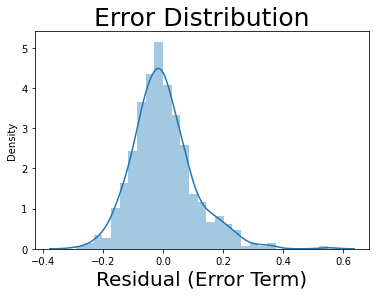

In [72]:
y_train_pred = lr7.predict(X_train_lm7)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show()

#### Note: From the above graph it is evident that Error Distribution Is Normally Distributed Across 0, which indicates that our model has handled the assumption of Error Normal Distribution properly.

## Assumption of Error Terms Being Independent

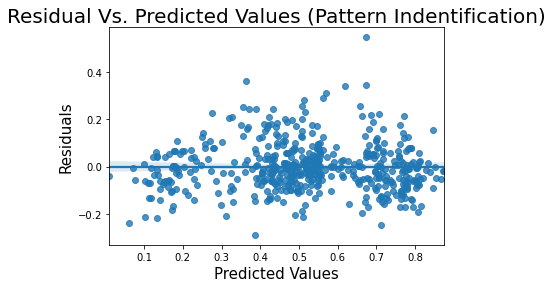

In [73]:
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

- From the above graph, we see that there is almost no relation between Residual & Predicted Value. This is what we had expected from our model to have no specific pattern.

## Homoscedasticity

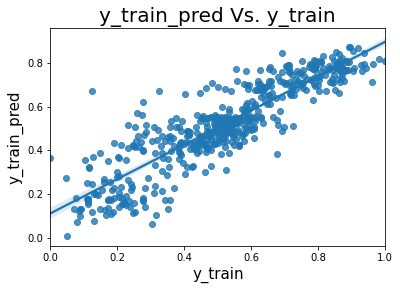

In [74]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('y_train_pred Vs. y_train', fontdict={'fontsize': 20})
plt.xlabel('y_train', fontdict={'fontsize': 15})
plt.ylabel('y_train_pred', fontdict={'fontsize': 15})
plt.show()

Homoscedasticity of Error Terms
- From the above graph, we can say that residuals are equal distributed across predicted value.
- This means we see equal variance and we do NOT observe high concentration of data points in certain region & low concentarion in certain regions. 

## Making predictions using the final model

- Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. Model 7.

#### Applying the scaling on the test sets

In [75]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [76]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snow,weathersit_Mist_cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.511416,0.013699,0.698630,0.532638,0.534406,0.570238,0.337573,0.506715,0.255708,0.214612,...,0.068493,0.082192,0.155251,0.146119,0.141553,0.164384,0.114155,0.150685,0.041096,0.315068
std,0.501015,0.116503,0.459904,0.238459,0.234352,0.193463,0.152768,0.224066,0.437258,0.411493,...,0.253169,0.275286,0.362974,0.354034,0.349389,0.371472,0.318728,0.358561,0.198967,0.465607
min,0.000000,0.000000,0.000000,0.060271,0.055477,-0.239512,0.047450,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332325,0.335935,0.424057,0.230151,0.349804,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.552460,0.563381,0.555496,0.324359,0.510354,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.727787,0.703710,0.425641,0.678613,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.983385,1.049574,0.970791,0.864144,0.951680,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividing into X_test & y_test

In [77]:
y_test = df_test.pop('cnt')
X_test = df_test

In [78]:
X_train_new.columns

Index(['yr', 'windspeed', 'season_spring', 'mnth_Dec', 'mnth_Nov', 'mnth_Sep',
       'weekday_Sunday', 'weathersit_Light_snow', 'weathersit_Mist_cloudy'],
      dtype='object')

In [79]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 256 to 461
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      219 non-null    int64  
 1   holiday                 219 non-null    int64  
 2   workingday              219 non-null    int64  
 3   temp                    219 non-null    float64
 4   atemp                   219 non-null    float64
 5   hum                     219 non-null    float64
 6   windspeed               219 non-null    float64
 7   season_spring           219 non-null    uint8  
 8   season_summer           219 non-null    uint8  
 9   season_winter           219 non-null    uint8  
 10  mnth_Aug                219 non-null    uint8  
 11  mnth_Dec                219 non-null    uint8  
 12  mnth_Feb                219 non-null    uint8  
 13  mnth_Jan                219 non-null    uint8  
 14  mnth_Jul                219 non-null    

In [80]:
# Lets use our model for predictions
# Create X_test dataframe 
C1 = X_train_new.columns
X_test = X_test[C1]

# Adding constant variable to test dataframe
X_test_lm7 = sm.add_constant(X_test)
X_test_lm7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 256 to 461
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   const                   219 non-null    float64
 1   yr                      219 non-null    int64  
 2   windspeed               219 non-null    float64
 3   season_spring           219 non-null    uint8  
 4   mnth_Dec                219 non-null    uint8  
 5   mnth_Nov                219 non-null    uint8  
 6   mnth_Sep                219 non-null    uint8  
 7   weekday_Sunday          219 non-null    uint8  
 8   weathersit_Light_snow   219 non-null    uint8  
 9   weathersit_Mist_cloudy  219 non-null    uint8  
dtypes: float64(2), int64(1), uint8(7)
memory usage: 8.3 KB


In [81]:
# Making predictions using the final model (lr6)
y_pred = lr7.predict(X_test_lm7)

## MODEL EVALUATION

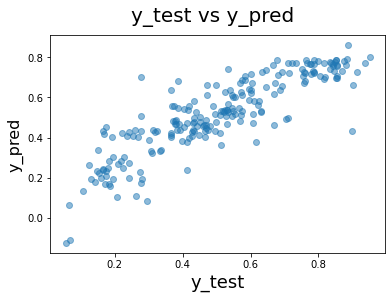

In [82]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

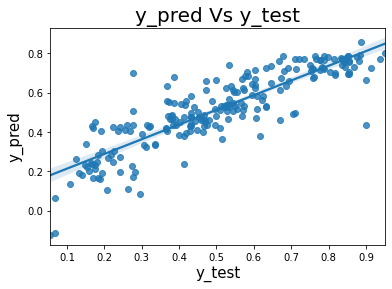

In [83]:
corr_plot = sns.regplot(x=y_test, y=y_pred)
plt.title('y_pred Vs y_test', fontdict={'fontsize': 20})
plt.xlabel('y_test', fontdict={'fontsize': 15})
plt.ylabel('y_pred', fontdict={'fontsize': 15})
plt.show()

## Generating R-Square

In [84]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7515429815073369

# Final Model Interpretation

lr7 model coefficients values
- const                      0.5908
- yr                         0.2362
- windspeed                 -0.1958
- season_spring             -0.2785
- mnth_Dec                  -0.0917
- mnth_Nov                  -0.1129
- mnth_Sep                   0.0718
- weekday_Sunday            -0.0430
- weathersit_Light_snow     -0.3281
- weathersit_Mist_cloudy    -0.0780

## Equation for our best fit line

* cnt=0.5908 + 0.2362*(yr) - 0.1958*(windspeed) - 0.2785*(season_spring) - 0.0917*(month_Dec) - 0.1129*(mnth_Nov) + 0.0718*(mnth_Sep) - 0.0430*(weekday_Sunday) - 0.3281*(weathersit_Light_snow) - 0.0780*(weathersit_Mist_cloudy)

#### F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic of Model 7 is the highest compared to the other models: 202.0
- Prob (F-statistic): 2.61e-160
- The F-Statistics value of 202.0 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant